Bayesian Regression for the Olympic data
==

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

Load the Olympic data

In [7]:
data = np.loadtxt('../olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]
print(x.shape)
print(t.shape)

x = (x - 1896)/4.0

sig_sq = 0.05 # Noise variance -- we assume this is fixed

(27, 1)
(27, 1)


Define the prior over $\mathbf{w}$

In [124]:
k = 2 # polynomial order
mu0 = np.zeros((k+1,1),dtype=np.float)
sig0 = 100.0*np.identity(k+1,dtype=np.float)

Plot the prior contours -- this code will only work if k=1

In [125]:
w0vals,w1vals = np.meshgrid(np.arange(-20,20,0.5),np.arange(-20,20,0.5))
pdfvals = np.zeros_like(w0vals)
for i,w0_vec in enumerate(w0vals):
    for j,w0 in enumerate(w0_vec):
        w1 = w1vals[i][j]
        w = np.vstack((w0,w1))
        pdfvals[i][j] = -0.5*np.dot((w-mu0).T,np.dot(np.linalg.inv(sig0),(w-mu0)))
plt.contour(w0vals,w1vals,np.exp(pdfvals))

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

Construct the $\mathbf{X}$ object, and the test one

In [126]:
testx = np.linspace(-10,50,100)[:,None]
X = np.ones_like(x)
testX = np.ones_like(testx)
for i in range(k):
    X = np.hstack((X,x**(i+1)))
    testX = np.hstack((testX,testx**(i+1)))

Compute the posterior mean and covariance

In [127]:
sig_w = np.linalg.inv((1.0/sig_sq)*np.dot(X.T,X) + np.linalg.inv(sig0))
mu_w = (1.0/sig_sq)*np.dot(sig_w,np.dot(X.T,t))


Plot the prior and posterior contours

In [128]:
posterior_pdfvals = np.zeros_like(w0vals)
for i,w0_vec in enumerate(w0vals):
    for j,w0 in enumerate(w0_vec):
        w1 = w1vals[i][j]
        w = np.vstack((w0,w1))
        posterior_pdfvals[i][j] = -0.5*np.dot((w-mu_w).T,np.dot(np.linalg.inv(sig_w),(w-mu_w)))
plt.contour(w0vals,w1vals,np.exp(pdfvals))
plt.contour(w0vals,w1vals,np.exp(posterior_pdfvals))

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

Compute the predictions

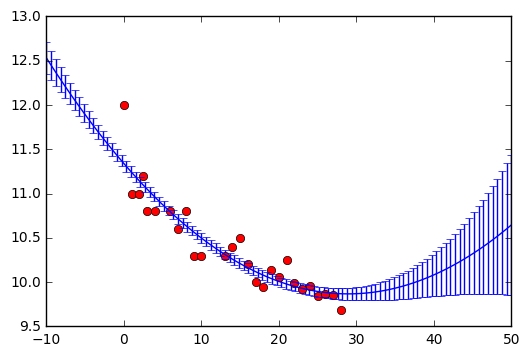

In [131]:
predmu = np.dot(testX,mu_w)
predvar = sig_sq + np.diag(np.dot(testX,np.dot(sig_w,testX.T)))
plt.plot(x,t,'ro')
plt.errorbar(testx,predmu,predvar)

Extra things
==

Plot some samples from the prior

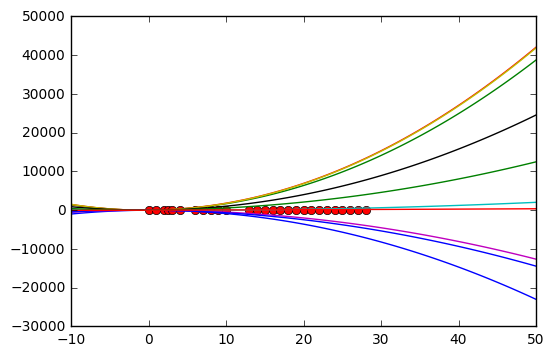

In [137]:
plt.plot(x,t,'ro')
for i in range(10):
    w_samp = np.random.multivariate_normal(mu0.flatten(),sig0)
    plt.plot(testx,np.dot(testX,w_samp))

Plot some samples from the posterior

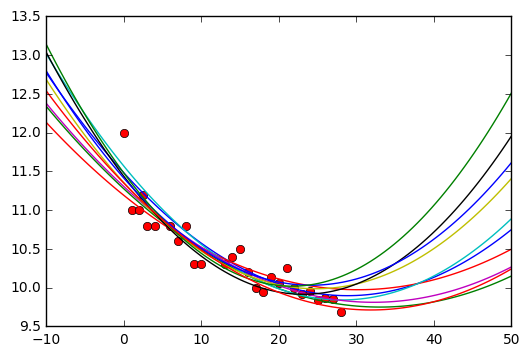

In [140]:
plt.plot(x,t,'ro')
for i in range(10):
    w_samp = np.random.multivariate_normal(mu_w.flatten(),sig_w)
    plt.plot(testx,np.dot(testX,w_samp))